In [1]:
import numpy as np
import matplotlib.pyplot as plt

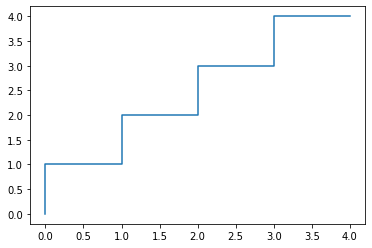

In [15]:
def walk_1d(start=0, steps=100, prob_up=0.5, reflecting=-np.inf, absorbing=np.inf):
    walk = [start]
    while walk[-1] < absorbing:
        if np.random.random() < prob_up:
            walk += [walk[-1] + 1]  # go up
        else:
            walk += [walk[-1] - 1]  # go down
        if walk[-1] < reflecting:
            walk[-1] = 1
        if len(walk)-1 == steps: break
    return walk

walk = walk_1d(reflecting=0, absorbing=4)
plt.step(range(len(walk)), walk)

In [51]:
walks = np.array([len(walk_1d(start=0, steps=np.inf, reflecting=0, absorbing=4))-1 for i in range(100000)])
walks.min(), walks.max(), walks.mean()

(4, 182, 16.04416)

In [52]:
walks = np.array([len(walk_1d(start=1, steps=np.inf, reflecting=0, absorbing=4))-1 for i in range(100000)])
walks.min(), walks.max(), walks.mean()

(3, 147, 14.96274)

In [53]:
walks = np.array([len(walk_1d(start=2, steps=np.inf, reflecting=0, absorbing=4))-1 for i in range(10000)])
walks.min(), walks.max(), walks.mean()

(2, 116, 11.78)

In [54]:
walks = np.array([len(walk_1d(start=3, steps=np.inf, reflecting=0, absorbing=4))-1 for i in range(10000)])
walks.min(), walks.max(), walks.mean()

(1, 109, 6.9592)

In [59]:
steps_to_origin = []

sims = 1000

for i in range(sims):
    walk = walk_1d(steps=20000)
    origin_positions = np.where(np.array(walk[1:]) == 0)[0]
    if len(origin_positions):
        steps_to_origin += [origin_positions[0] + 1]

steps_to_origin = np.array(steps_to_origin)
steps_to_origin.min(), steps_to_origin.max(), steps_to_origin.mean(), len(steps_to_origin) / sims

(2, 15320, 113.5725806451613, 0.992)

In [62]:
steps_to_origin = []

sims = 1000

for i in range(sims):
    walk = walk_1d(steps=20000)
    origin_positions = np.where(np.array(walk[1:]) == 0)[0]
    if len(origin_positions):
        steps_to_origin += [origin_positions[0] + 1]
    else:
        steps_to_origin += [len(walk)-1]

steps_to_origin = np.array(steps_to_origin)
steps_to_origin.min(), steps_to_origin.max(), steps_to_origin.mean()

(2, 20000, 246.416)

In [63]:
np.where(steps_to_origin == 20000)

(array([461, 546, 548, 647, 757, 773, 912]),)

In [65]:
def calculate_probability_of_returning(steps):
    steps_to_origin = []

    sims = 1000

    for i in range(sims):
        walk = walk_1d(steps=steps)
        origin_positions = np.where(np.array(walk[1:]) == 0)[0]
        if len(origin_positions):
            steps_to_origin += [origin_positions[0] + 1]

    steps_to_origin = np.array(steps_to_origin)
    return len(steps_to_origin) / sims

steps = [10, 100, 1000, 10000, 100000]

probability = [calculate_probability_of_returning(si) for si in steps]

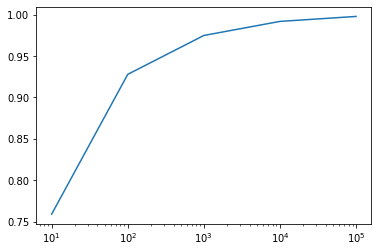

In [71]:
plt.semilogx(steps, probability)